In [190]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import VarianceThreshold

from scipy.stats import normaltest
from scipy.stats import shapiro

import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
train_df = pd.read_csv(r"C:\Users\Yevheniy\Desktop\House Prices\House Prices\data\train.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df = pd.read_csv(r"C:\Users\Yevheniy\Desktop\House Prices\House Prices\data\test.csv")

In [12]:
sample_submission = pd.read_csv(r"C:\Users\Yevheniy\Desktop\House Prices\House Prices\data\\sample_submission.csv")

In [13]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# Data info

In [19]:
train_df.shape

(1460, 81)

In [20]:
test_df.shape

(1459, 80)

In [21]:
sample_submission.shape

(1459, 2)

# Get columns 

In [137]:
NULL_COLUMNS = train_df.loc[:, train_df.isnull().sum() >= 0.5].columns

In [138]:
len(NULL_COLUMNS)

19

In [139]:
NUMERIC_COLUMS = []
CATEGORICAL_COLUMNS = []

In [140]:
for column in train_df.drop(['Id', 'SalePrice'], 1).columns:
    if train_df[column].dtypes == "object":
        CATEGORICAL_COLUMNS.append(column)
    else:
        NUMERIC_COLUMS.append(column)

C:\Users\Yevheniy\AppData\Local\Temp/ipykernel_8028/2561859065.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  for column in train_df.drop(['Id', 'SalePrice'], 1).columns:


In [141]:
for elements in train_df[NUMERIC_COLUMS]:
    print(elements)
    print(train_df[elements].iloc[:5])
    print('-------------')

MSSubClass
0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64
-------------
LotFrontage
0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64
-------------
LotArea
0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64
-------------
OverallQual
0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64
-------------
OverallCond
0    5
1    8
2    5
3    5
4    5
Name: OverallCond, dtype: int64
-------------
YearBuilt
0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64
-------------
YearRemodAdd
0    2003
1    1976
2    2002
3    1970
4    2000
Name: YearRemodAdd, dtype: int64
-------------
MasVnrArea
0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64
-------------
BsmtFinSF1
0    706
1    978
2    486
3    216
4    655
Name: BsmtFinSF1, dtype: int64
-------------
BsmtFinSF2
0    0
1    0
2    0
3    0
4    0
Name: BsmtFinSF2, dtype: int6

In [142]:
add_cat_columns = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath',
                  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
                  'GarageCars', 'YrSold']

In [143]:
CATEGORICAL_COLUMNS.extend(add_cat_columns)

In [144]:
len(CATEGORICAL_COLUMNS)

59

In [145]:
for column in add_cat_columns:
    NUMERIC_COLUMS.remove(column)

In [146]:
var_threshold = VarianceThreshold(threshold = 1)

In [147]:
a = var_threshold.fit(train_df[NUMERIC_COLUMS])

In [148]:
LOW_VAR_COLUMNS = [x for x in train_df[NUMERIC_COLUMS].columns if x not in train_df[NUMERIC_COLUMS].columns[a.get_support()]]

In [149]:
len(LOW_VAR_COLUMNS)

0

In [160]:
NUMERIC_COLUMS_DROPED_NULL_COLUMNS = []
CATEGORICAL_COLUMNS_DROPED_NULL_COLUMNS = []

In [161]:
for column in NUMERIC_COLUMS:
    if column not in NULL_COLUMNS:
        NUMERIC_COLUMS_DROPED_NULL_COLUMNS.append(column)

In [162]:
for column in CATEGORICAL_COLUMNS:
    if column not in NULL_COLUMNS:
        CATEGORICAL_COLUMNS_DROPED_NULL_COLUMNS.append(column)

# Exploratory data analysis

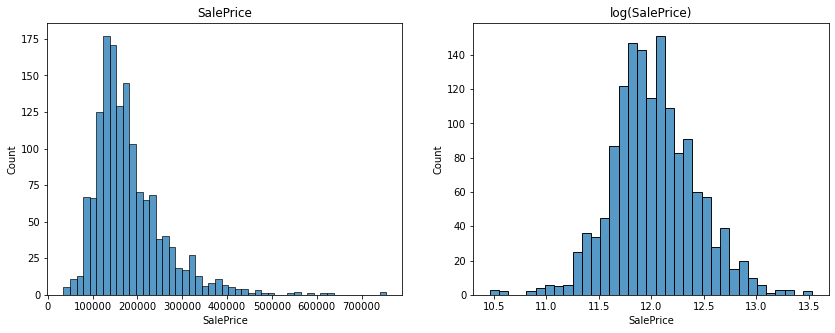

In [189]:
fig, axes = plt.subplots(ncols=2,figsize=(14,5) )

fig1 = sns.histplot(data = train_df.SalePrice, ax= axes[0] )
fig2 = sns.histplot(data = np.log(train_df.SalePrice), ax = axes[1])

fig1.title.set_text("SalePrice")
fig2.title.set_text("log(SalePrice)")

In [191]:
normaltest(np.log(train_df.SalePrice))

NormaltestResult(statistic=25.507009834238303, pvalue=2.89216582205235e-06)

In [192]:
shapiro(np.log(train_df.SalePrice))

ShapiroResult(statistic=0.9912067651748657, pvalue=1.1490678986092462e-07)